# 1. 다목적 미분함수

In [2]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
func = lambda x,y : 2*x + y

<IPython.core.display.Javascript object>


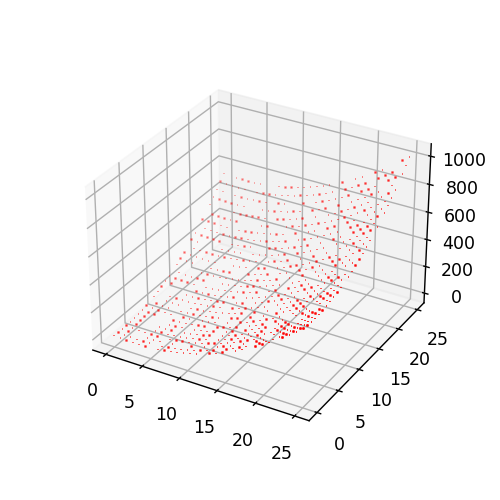

In [44]:
x = np.linspace(0, 25, 30)
y = np.linspace(0, 25, 30)

x,y = np.meshgrid(x,y)

plt.rcParams["figure.figsize"] = (4, 4)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, func(x,y), c='r', marker='s', s=0.1)

<IPython.core.display.Javascript object>


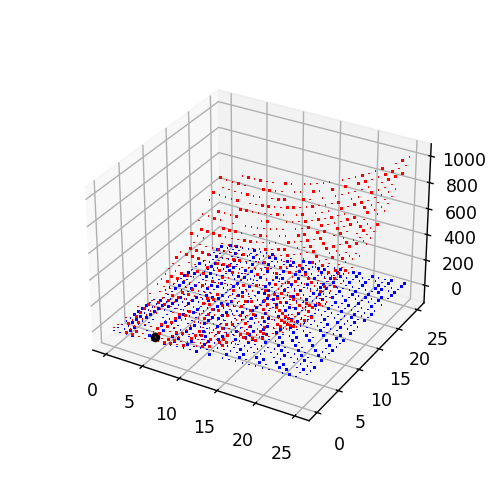

error :  273.99982000118916


In [45]:
h = 1e-5

def derivative_x(f,x,y):
    return (f(x+h,y)-f(x,y))/ h

def derivative_y(f,x,y):
    return (f(x,y+h)-f(x,y))/ h

def plane(f,x,y,a,b,x_prime,y_prime):
    return x_prime*(x-a)+y_prime*(y-b)+f(a,b)

def vis_approx_plane(x_range, y_range, Func, tan_point):
    
    x, y = np.meshgrid(x_range,y_range)
    
    a = tan_point[0]
    b = tan_point[1]
    
    x_prime = derivative_x(Func,a,b)
    y_prime = derivative_y(Func,a,b)
    
    plt.rcParams["figure.figsize"] = (4, 4)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(x, y, Func(x,y), c='r', marker='s', s=0.1)
    ax.scatter(x, y, plane(Func,x,y,a,b,x_prime,y_prime), c='b', marker='s', s=0.1)
    ax.scatter(a,b,c='k')
    
    error = 0
    
    Min = int(np.min(x_range))
    Max = int(np.max(x_range))
    k = Max - Min
    for i in range(Min,Max):
        for j in range(Min,Max):
            error += abs(Func(i,j)- plane(Func,i,j,a,b,x_prime,y_prime))
            
    error = error/ (k*k)
    print('error : ',error)
 
rand_x = random.randint(0,25)
rand_y = random.randint(0,25)

vis_approx_plane(x,y,func,(rand_x,rand_y))
    
    

In [ ]:
def func(x,y):
    return (x-3)**2+(y-2)**2

def func2(x,y):
    return (x*y)/(x**2+y**2)

# func = lambda x, y : (x-3)**2+(y-2)**2
# func2 = lambda x, y : (x*y)/(x**2+y**2)

# 2. 다목적 미분함수 활용

In [9]:
xy_range = [((-101,105),(-101,105)),
           ((-51,55),(-51,55)),
           ((-31,35),(-31,35)),
           ((-11,15),(-11,15)),
           ((-1.75,2.25),(-1.75,2.25))]

a = (2,2)

<IPython.core.display.Javascript object>


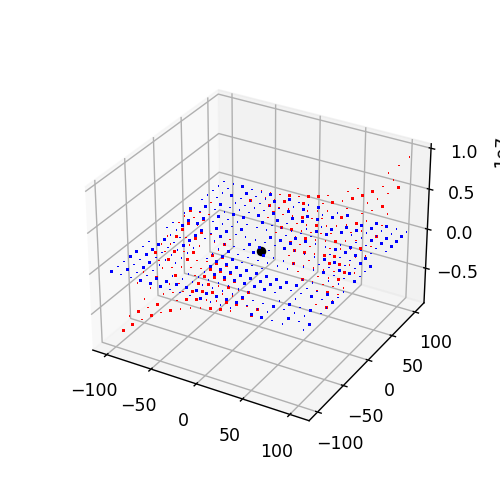

error :  872721.4008868057


In [46]:
def new_func(x,y):
    return (x+y)**3

x = np.linspace(-101,105, 20) # 제 컴퓨터에서 렉이 심해서 점을 여러개 찍지는 못했는데 점을 늘리고 싶으시면 20을 더 키우시면 됩니다!
y = np.linspace(-101,105, 20)

x,y = np.meshgrid(x,y)

vis_approx_plane(x, y, new_func, (2,2))

<IPython.core.display.Javascript object>


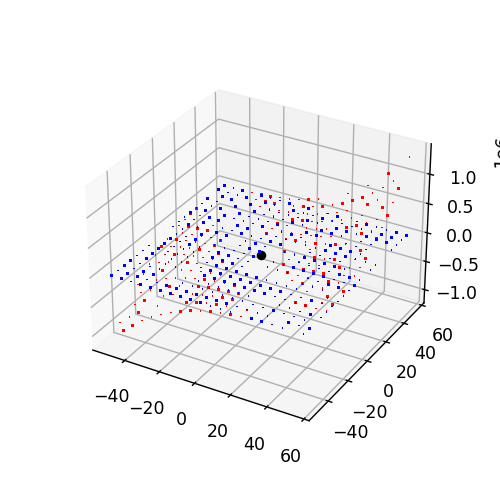

error :  118372.38592010923


In [47]:
x = np.linspace(-51,55, 20)
y = np.linspace(-51,55, 20)

x,y = np.meshgrid(x,y)

vis_approx_plane(x, y, new_func, (2,2))

<IPython.core.display.Javascript object>


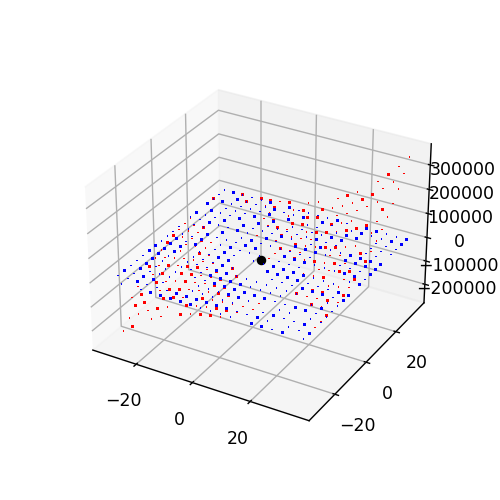

error :  28323.6794291121


In [49]:
x = np.linspace(-31,35, 20)
y = np.linspace(-31,35, 20)

x,y = np.meshgrid(x,y)

vis_approx_plane(x, y, new_func, (2,2))

<IPython.core.display.Javascript object>


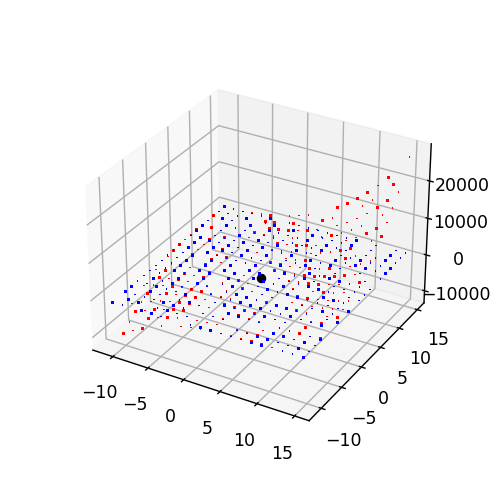

error :  1671.8071661586546


In [50]:
x = np.linspace(-11,15, 20)
y = np.linspace(-11,15, 20)

x,y = np.meshgrid(x,y)

vis_approx_plane(x, y, new_func, (2,2))

<IPython.core.display.Javascript object>


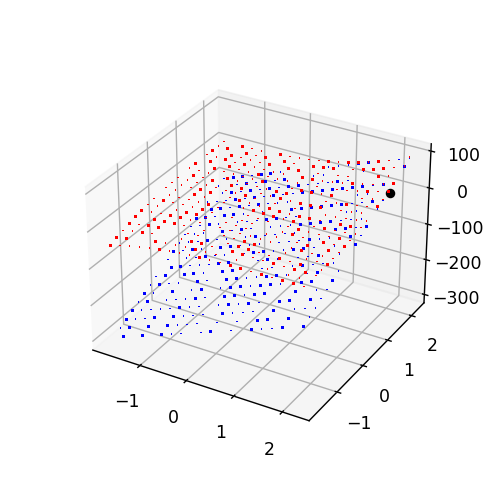

error :  128.00047999561318


In [51]:
x = np.linspace(-1.75,2.25, 20)
y = np.linspace(-1.75,2.25, 20)

x,y = np.meshgrid(x,y)

vis_approx_plane(x, y, new_func, (2,2))

In [39]:
'''
오류 
1.872721.4008868057
2.118372.38592010923
3.28323.6794291121
4.1671.8071661586546
5.128.00047999561318

오류 소숫점 제거
1.872721
2.118372
3.28323
4.1671
5.128

오류는 넓은 범위를 계산했을 때가 좁은 범위를 계산했을 때보다 더 컸습니다.
접평면은 (2,2) 를 중심으로 만들어 졌기 때문에 그래프에서 멀어질 수록 z값의 차이 벌어지고 오류가 커지는 것을 볼 수 있었습니다.


'''

'\n오류 \n1.872721.4008868057\n2.118372.38592010923\n3.28323.6794291121\n4.1671.8071661586546\n5.128.00047999561318\n\n오류 소숫점 제거\n1.872721\n2.118372\n3.28323\n4.1671\n5.128\n\n'

## 고찰

In [ ]:
'''
이 과제를 처음 받았을 때 2가지 어려운 점이 있을 것 같았습니다. 하나는 접평면을 이해하는 것이고, 다른 하나는 그래프로 나타내는 것이었습니다.
접평면은 분명 이전에 수학시간에 배웠고, 인공지능 수업에서 편도함수와 다변수함수에 대해 배워서 접평면의 방정식을 만들 때
이용할 수 있었습니다. 그래프로 나타내는 것도 접평면을 구현한 후에는 어렵지 않게 만들었는데, 처음에 평명이 만들어지지 않고,
직선으로만 그려져서 이 부분을 해결하는데 오래걸렸고, 제가 사용한 meshgrid 함수로 grid를 이용해서 분명 평면을 만드는 방법 외에도
다른 방법이 있을 것 같아서 찾아봐야겠다고 생각이 들었습니다.

'''